In [2]:
from keras import applications
from keras.models import load_model
# build the VGG16 network
#model = applications.VGG16(include_top=False,
#                           weights='imagenet')

#model = applications.InceptionResNetV2(include_top=False,
#                                      weights='imagenet')

model = load_model('face-rec_Google.h5')

# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])

C:\Users\Ros\Anaconda3\envs\face\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\Ros\Anaconda3\envs\face\lib\site-packages\keras\engine\saving.py:269: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [3]:
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

### Utility function to convert a tensor to image

In [4]:
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x



### Function to generate filter visuvalization

In [5]:
def generate_pattern(layer_name, filter_index, size = 150):
    layer_output = layer_dict[layer_name].output
    loss = K.mean(layer_output[:, :, :, filter_index])

    # compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, model.input)[0]

    # normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input],[loss, grads])
    
    input_img_data = np.random.random((1,150,150,3)) * 20 + 128.
    
    step = 1
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

In [ ]:
img_x = generate_pattern(layer_name,0,size=150)

In [ ]:
img_x.shape

In [ ]:
plt.imshow(img_x.reshape(150,150,3))

In [ ]:
import cv2

In [ ]:
img_cat = plt.imread('cat.jpg')
plt.imshow(img_cat)

In [ ]:
type(img_cat[0][0][1])

In [ ]:
img_cat.shape

### image preprocessing 

In [7]:
from keras.preprocessing import image


In [8]:
#img_keras = image.load_img('cat.jpg',target_size=(150,150))
img_keras = image.load_img('test_img.jpg',target_size=(96,96))

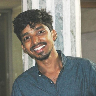

In [9]:
img_keras

In [10]:
img_keras_tensor = image.img_to_array(img_keras)
img_keras_tensor = np.expand_dims(img_keras_tensor,axis=0)
#img_keras_tensor.shape
img_keras_tensor /=255.

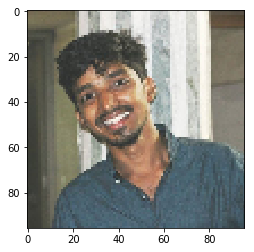

In [11]:
plt.imshow(img_keras_tensor[0])

In [12]:
def generate_pattern_2(img,layer_name, filter_index,size = 96):
    layer_output = layer_dict[layer_name].output
    loss = K.mean(layer_output[:, :, :, filter_index])

    # compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, model.input)[0]

    # normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input],[loss, grads])
    
    #input_img_data = np.random.random((1,size,size,3)) * 20 + 128.
    #print(input_img_data.shape)
    input_img_data = img
    
    step = 1
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img).reshape(size,size,3)

In [13]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 3, 96, 96)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 3, 102, 102)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 48, 48)   9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn1 (BatchNormalization)        (None, 64, 48, 48)   256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [10]:
layer_dict

{'input_1': <keras.engine.input_layer.InputLayer at 0x2e2fcc36dd8>,
 'zero_padding2d_1': <keras.layers.convolutional.ZeroPadding2D at 0x2e2fcc4f390>,
 'conv1': <keras.layers.convolutional.Conv2D at 0x2e2fcc4f128>,
 'bn1': <keras.layers.normalization.BatchNormalization at 0x2e2fcc4f358>,
 'activation_1': <keras.layers.core.Activation at 0x2e2fcc4f550>,
 'zero_padding2d_2': <keras.layers.convolutional.ZeroPadding2D at 0x2e2fcc4f588>,
 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D at 0x2e2fcc4f5f8>,
 'conv2': <keras.layers.convolutional.Conv2D at 0x2e2fcc4f6a0>,
 'bn2': <keras.layers.normalization.BatchNormalization at 0x2e2fcc4f828>,
 'activation_2': <keras.layers.core.Activation at 0x2e2fcc4f940>,
 'zero_padding2d_3': <keras.layers.convolutional.ZeroPadding2D at 0x2e2fcc4f978>,
 'conv3': <keras.layers.convolutional.Conv2D at 0x2e2fcc4f9e8>,
 'bn3': <keras.layers.normalization.BatchNormalization at 0x2e2fcc4fb70>,
 'activation_3': <keras.layers.core.Activation at 0x2e2fcc4fc88>,


In [ ]:
model.summary()

### testing our function

In [ ]:
img_y = generate_pattern_2(img_keras_tensor,layer_name = 'inception_3b_3x3_conv1',filter_index=0,size=96)

In [ ]:
img_y.shape

In [ ]:
plt.imshow(img_keras_tensor[0])

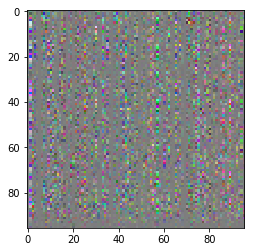

In [16]:
plt.imshow(img_y)

### generating a grid of all filter response patterns in a layer

In [ ]:
layer_dict

In [ ]:
layer_name = 'block5_conv3'
size = 64
margin = 5

results = np.zeros((8*size+7*margin, 8*size+7 * margin, 3))

In [ ]:
results.shape

In [ ]:
results[0:64,0:64, :].shape

In [ ]:
for i in range(8):
    for j in range(8):
        filter_img = generate_pattern_2(layer_name,i +(j*8),size=size)
        #plt.imshow(filter_img)
        horizontal_start = i*size + i*margin
        horizontal_end = horizontal_start + size
        vertical_start = j*size + j*margin
        vertical_end = vertical_start + size
        results[horizontal_start:vertical_start,vertical_end:horizontal_end, : ] = filter_img
        #results[horizontal_start:horizontal_end,vertical_start:vertical_end, : ] = filter_img
        
plt.figure(figsize=(20,20))
plt.imshow(results)

In [ ]:
64*64*3

In [ ]:

for i in range(8):
    for j in range(8):
        filter_img = generate_pattern_2(layer_name,i +(j*8),size=size)
        plt.subplot(8,8,8*j + i + 1)
        #plt.imshow(filter_img)
        #horizontal_start = i*size + i*margin
        #horizontal_end = horizontal_start + size
        #vertical_start = j*size + j*margin
        #vertical_end = vertical_start + size
        
        plt.figure(figsize=(20,20))
        plt.imshow(filter_img)
plt.show()